In [1]:
import matplotlib.pyplot as plt
from skimage.segmentation import mark_boundaries
from skimage.transform import downscale_local_mean, rotate
import numpy as np
import os
import tifffile
from scipy import ndimage
import time
import torch
from torch.utils.data import Dataset, DataLoader
#import dataloader1 as dataloader
import dataloader as dataloader
import cv2
import skimage

In [2]:

if torch.cuda.is_available():
    device_count = torch.cuda.device_count()
    print(f"Number of CUDA devices available: {device_count}")
    for i in range(device_count):
        device = torch.cuda.get_device_name(i)
        print(f"Device {i}: {device}")
else:
    print("CUDA is not available on this machine.")

Number of CUDA devices available: 1
Device 0: Quadro RTX 4000


In [3]:
patch_size = 64
batch_size = 1

In [4]:
# Set the paths to data and target files

#data_path ='data/01_Upscaled_Substack (7882-8277)_B45_bag5.tif'

#target_path = 'data/01_registered_3dCT_B45_bag5_100mm.tif'
files = [('01_Upscaled_Substack (7882-8277)_B45_bag5.tif','01_registered_3dCT_B45_bag5_100mm.tif')]

In [5]:
# If need to generate pathes for the firs time then put true for the need_patches
train_dataset = dataloader.microCT_Dataset(files,
                                         HR_patch_size=patch_size,
                                         transform = None,
                                          need_patches=True)

reading data shape =  (772, 1800, 1790)
reading data max =  255
(12, 28, 27, 128, 128, 128)
(12, 28, 27, 64, 64, 64)
out_of_loader data shape =  (9072, 128, 128, 128)
out_of_loader data max =  255
out_of_loader target shape =  (9072, 64, 64, 64)
out_of_loader target max =  255
Time =  5  minutes


In [6]:
train_data_loader = DataLoader(train_dataset,
                              batch_size=batch_size,
                              shuffle=True)

In [7]:
# Create an iterator for the DataLoader
data_iter = iter(train_data_loader)



Input Data Shape: torch.Size([1, 1, 64, 64, 64])
Target Shape: torch.Size([1, 1, 64, 64, 64])
tensor(212.2500)
mask (64, 64)
(64, 64)


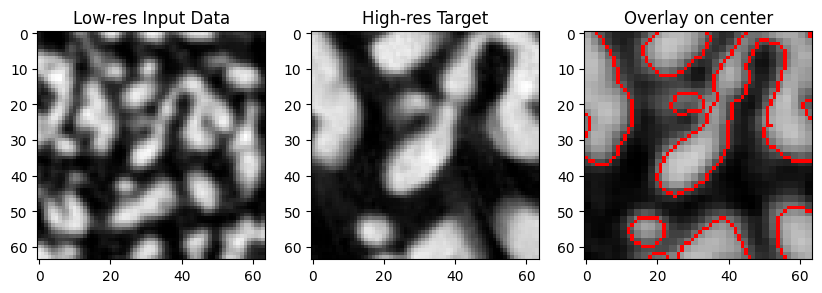

In [8]:
# Get one batch (one sample) from the iterator
sample_batch = next(data_iter)

# Extract input and target from the sample batch
input_data, target = sample_batch

# Now, you have one sample of input data and its corresponding target
print("Input Data Shape:", input_data.shape)
print("Target Shape:", target.shape)

input_image = input_data[0,0,16,:,:]
target_image = target[0,0,0,:,:]

print (input_image.max())
# Plotting side by side
fig, axes = plt.subplots(1, 3, figsize=(10, 5))
# Plot input image

axes[0].imshow(input_image, cmap='gray') 
axes[0].set_title('Low-res Input Data')
#axes[0].axis('off')

# Plot target image
axes[1].imshow(target_image, cmap='gray')  # Assuming target is grayscale
axes[1].set_title('High-res Target')
#axes[1].axis('off')

zoom = int(patch_size/4)
input_image = input_image[zoom:-zoom,zoom:-zoom]
input_image = ndimage.zoom(input_image,2, order = 0, prefilter=False, grid_mode=False)

#target_image_paded = np.pad(target_image,((zoom,zoom),(zoom,zoom)))
mask = np.zeros_like(target_image, dtype='uint8')

thresh = 70
mask[target_image>=thresh] = 1
mask[target_image<thresh] = 0
print ('mask' ,mask.shape)
input_image = input_image.astype('uint8')
print (input_image.shape)
overlay = mark_boundaries(input_image, mask, color=(1, 0, 0))
axes[2].imshow(overlay)  # Assuming target is grayscale
axes[2].set_title('Overlay on center')

plt.show()